In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from glob import glob
import sys
import matplotlib.pyplot as plt

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
path_variables = glob('../src/data/series/*csv')
path_rt = [path for path in path_variables if path.split('\\')[-1].split('.')[0][0].islower()]
path_variables = [path for path in path_variables if not path.split('\\')[-1].split('.')[0][0].islower()]

# load meteorological variables

In [4]:
variables = {}

for path in path_variables:
    
    if sys.platform == 'win32':
        var = path.split('\\')[-1].split('.')[0]
    
    else:
        var = path.split('/')[-1].split('.')[0]
        
    variables[var] = pd.read_csv(path, index_col = 0, parse_dates = True).astype(float)

variables['ERA5_ssr_mean'] = variables['ERA5_ssr_mean']/3600
variables['ERA5_ssr_sum'] = variables['ERA5_ssr_sum']/3600

# load transmission rates

In [6]:
transmission_rate = {}

for path in path_rt:
    
    if sys.platform == 'win32':
        var = path.split('\\')[-1].split('.')[0]
    
    else:
        var = path.split('/')[-1].split('.')[0]
        
    transmission_rate[var] = pd.read_csv(path, index_col = 0, parse_dates = True).astype(float)


# scatter plots

### Direct comparison

In [7]:
rt = transmission_rate['infected_cases']

In [8]:
departamento = rt.columns.values

In [9]:
departamento = 'Antioquia'

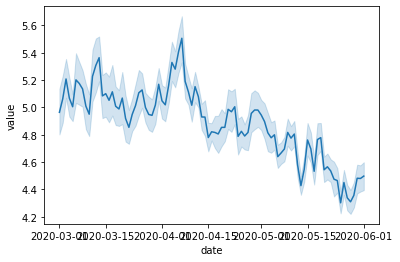

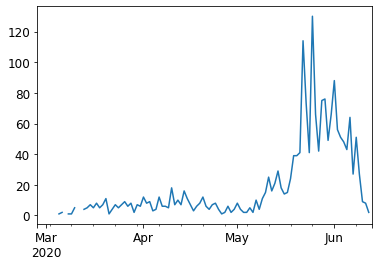

In [14]:
rt.plot()

In [18]:
lag = 0

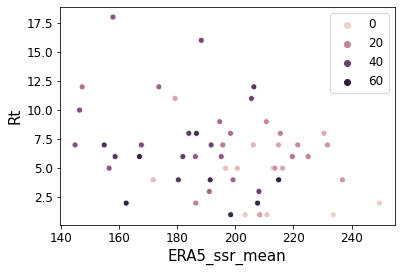

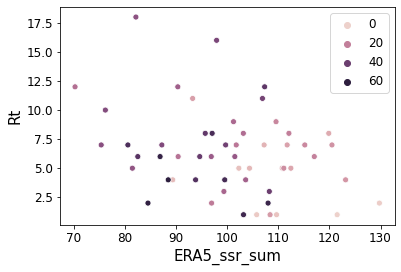

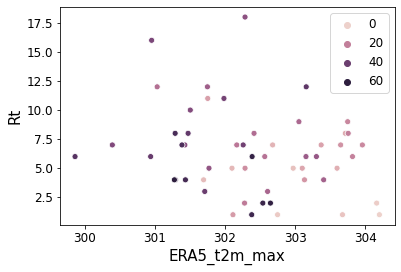

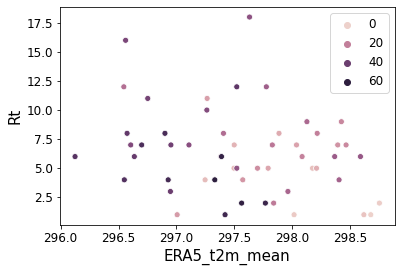

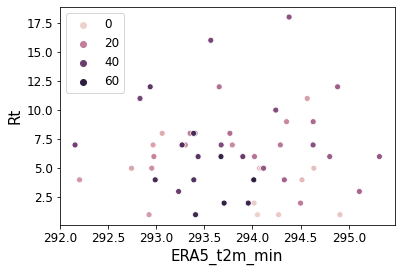

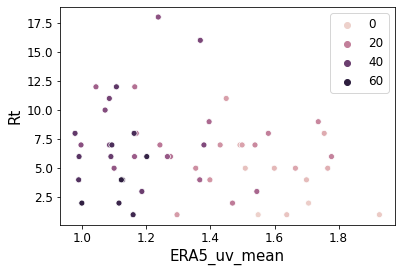

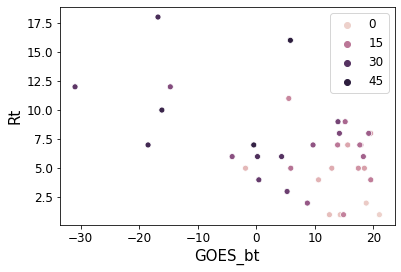

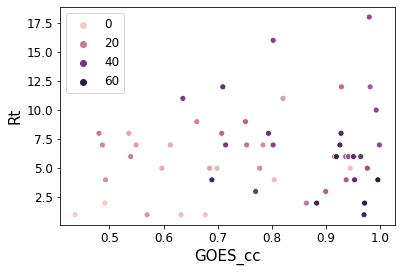

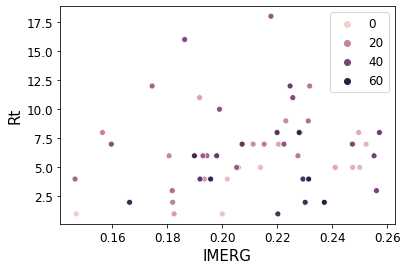

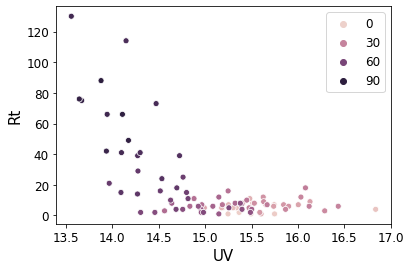

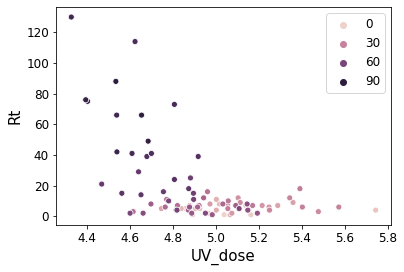

In [19]:
for var in variables:
    
    idx = rt.index.intersection(variables[var].index)
    rt_plot = rt.loc[idx, departamento].values.ravel()
    var_plot = variables[var].loc[idx, departamento].shift(lag).values.ravel()
    finite_values = np.isfinite(rt_plot)&np.isfinite(var_plot) 
    
    plt.figure()
#     ax = sns.jointplot(var_plot[finite_values], rt_plot[finite_values], kind="kde")
    ax = sns.scatterplot(var_plot[finite_values], rt_plot[finite_values], hue = range(var_plot[finite_values].size))

#     ax.set_axis_labels(var, 'Rt')
    
    ax.set_xlabel(var)
    ax.set_ylabel('Rt')    
    plt.show()
